In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [579]:
import re
rent_list = []
house = pd.read_csv("../data/prepared_data.csv")
house = house.drop_duplicates(subset=None, keep='first', inplace=False)
price_df = house[['price','rent']]
for index, values in price_df.iterrows():
    if pd.isna(values['rent']) or values['rent'] == 0:
        rent = re.findall(r'\d*[.]?\d+',values['price'])
        if len(rent) >= 1:
            house.loc[index,'rent'] = float(rent[0])
        else:
            house = house.drop(index = index)

            

In [644]:
house_df = house[house['rent'] > 0].reset_index()
house_df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'propertyTypes', 'bathrooms',
       'bedrooms', 'carspaces', 'dateUpdated', 'dateListed', 'geoLocation',
       'landAreaSqm', 'postcode', 'surburb', 'year', 'month', 'price', 'bond',
       'rent', 'longitude', 'latitude', 'geometry', 'index_right',
       'SA2_maincode_2021', 'bench', 'cafe', 'childcare', 'fast_food',
       'kindergarten', 'parking', 'restaurant', 'place_of_worship', 'school',
       'university', 'garden', 'park', 'playground', 'pitch', 'bus_count',
       'bus_distance', 'school_count', 'school_distance', 'tram_distance',
       'tram_count', 'train_distance', 'train_count', 'hospital_count',
       'shopping_mall_distance', 'shopping_mall_count', 'offence count',
       'incidents recorded', 'Earners', 'Median_age', 'sum', 'median', 'mean',
       'population', 'population_increase'],
      dtype='object')

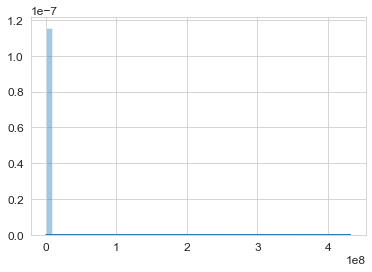

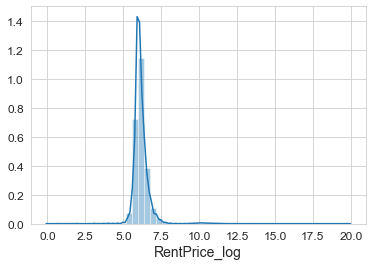

In [645]:
## check if we need to log the rental price as the price might be skewed
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

x = list(house_df['rent'])
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

house_df['RentPrice_log'] = np.log(house_df["rent"])
x = house_df['RentPrice_log']
sns.distplot(x)
plt.show()

In [548]:
house_df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'propertyTypes', 'bathrooms',
       'bedrooms', 'carspaces', 'dateUpdated', 'dateListed', 'geoLocation',
       'landAreaSqm', 'postcode', 'surburb', 'year', 'month', 'price', 'bond',
       'rent', 'longitude', 'latitude', 'geometry', 'index_right',
       'SA2_maincode_2021', 'bench', 'cafe', 'childcare', 'fast_food',
       'kindergarten', 'parking', 'restaurant', 'place_of_worship', 'school',
       'university', 'garden', 'park', 'playground', 'pitch', 'bus_count',
       'bus_distance', 'school_count', 'school_distance', 'tram_distance',
       'tram_count', 'train_distance', 'train_count', 'hospital_count',
       'shopping_mall_distance', 'shopping_mall_count', 'offence count',
       'Earners', 'Median_age', 'sum', 'median', 'mean', 'population',
       'population_increase', 'RentPrice_log'],
      dtype='object')

In [646]:
newdf = house_df.drop(['level_0','Unnamed: 0','price','geometry', 'geoLocation','index_right','SA2_maincode_2021'], axis=1)
def bond(val):
    if pd.isna(val) or val == 0:
        return 0
    return 1
newdf['has_bond'] = newdf['bond'].apply(bond)
newdf = newdf.drop(['bond'], axis=1)

In [647]:
newdf[['postcode','tram_count']].drop_duplicates()

,postcode,tram_count
0,3205,24
48,3206,21
152,3207,3
256,3004,6
939,3006,21
...,...,...
105901,3636,0
105909,3260,0
105911,3700,0
105912,3701,0


In [648]:
newdf = newdf.drop(['dateUpdated','dateListed'], axis=1)
newdf = newdf.drop(['sum','mean'],axis = 1)
newdf = newdf.drop(['Earners'],axis = 1)
newdf = newdf.drop(['landAreaSqm'],axis = 1)

In [649]:
newdf.isnull().sum()

index                         0
propertyTypes                 0
bathrooms                     0
bedrooms                      0
carspaces                     0
postcode                      0
surburb                       0
year                          0
month                         0
rent                          0
longitude                     0
latitude                      0
bench                        12
cafe                         12
childcare                    12
fast_food                    12
kindergarten                 12
parking                      12
restaurant                   12
place_of_worship             12
school                       12
university                   12
garden                       12
park                         12
playground                   12
pitch                        12
bus_count                     0
bus_distance                536
school_count                  0
school_distance               0
tram_distance                 0
tram_cou

In [650]:
newdf = newdf[newdf['bus_distance'] > 0]
for col in list(newdf.columns)[12:26]:
    newdf[col] = newdf[col].fillna(0)

In [651]:
newdf.isnull().sum()

index                         0
propertyTypes                 0
bathrooms                     0
bedrooms                      0
carspaces                     0
postcode                      0
surburb                       0
year                          0
month                         0
rent                          0
longitude                     0
latitude                      0
bench                         0
cafe                          0
childcare                     0
fast_food                     0
kindergarten                  0
parking                       0
restaurant                    0
place_of_worship              0
school                        0
university                    0
garden                        0
park                          0
playground                    0
pitch                         0
bus_count                     0
bus_distance                  0
school_count                  0
school_distance               0
tram_distance                 0
tram_cou

In [652]:
newdf = newdf.drop('population_increase',axis = 1)

In [653]:
for index, values in newdf[pd.isna(newdf['median'])].iterrows():
    income_median = newdf['median'].median()
    newdf.loc[index,'median'] = income_median
for index, values in newdf[pd.isna(newdf['Median_age'])].iterrows():
    Median_age = newdf['Median_age'].median()
    newdf.loc[index,'Median_age'] = Median_age

In [654]:
newdf = newdf[newdf['population'] > 0]
newdf

,index,propertyTypes,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,rent,longitude,latitude,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,bus_count,bus_distance,school_count,school_distance,tram_distance,tram_count,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,offence count,incidents recorded,Median_age,median,population,RentPrice_log,has_bond
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,3205,south melbourne,2019,1,360.0,144.960873,-37.834163,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.375,3,0.577,0.116,24,2.804,0,0,1.388,0,22895,17201,38.256757,66259.675774,12753.000000,5.886104,0
1,1,['house'],2.0,2.0,1.0,3205,south melbourne,2019,1,725.0,144.964862,-37.835075,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.730,3,0.299,0.111,24,2.442,0,0,1.714,0,22895,17201,38.256757,66259.675774,12753.000000,6.586172,0
2,2,['apartmentUnitFlat'],1.0,2.0,0.0,3205,south melbourne,2019,1,500.0,144.960818,-37.840217,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.766,3,0.579,0.059,24,2.751,0,0,1.927,0,22895,17201,38.256757,66259.675774,12753.000000,6.214608,0
3,3,['house'],1.0,3.0,0.0,3205,south melbourne,2019,1,795.0,144.953039,-37.836653,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.209,3,0.165,0.139,24,3.457,0,0,1.304,0,22895,17201,38.256757,66259.675774,12753.000000,6.678342,0
4,4,['house'],2.0,2.0,0.0,3205,south melbourne,2019,1,825.0,144.949687,-37.837520,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.143,3,0.475,0.394,24,3.544,0,0,1.370,0,22895,17201,38.256757,66259.675774,12753.000000,6.715383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105918,113161,['house'],1.0,3.0,1.0,3701,dartmouth,2022,5,280.0,147.493795,-36.536581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.649,2,10.219,249.694,0,233.799,0,0,68.639,0,302,230,47.856776,44583.025987,6181.185987,5.634790,0
105919,113162,['house'],1.0,3.0,1.0,3701,dartmouth,2022,6,290.0,147.494529,-36.536194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.627,2,10.283,249.772,0,233.877,0,0,68.662,0,302,230,47.856776,44583.025987,6181.185987,5.669881,0
105920,113163,['house'],1.0,3.0,2.0,3700,tallangatta,2022,8,470.0,147.258393,-36.221821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.265,3,7.593,253.141,0,240.828,0,1,32.738,0,605,484,37.094642,55510.153714,6181.185987,6.152733,0
105921,113164,['house'],1.0,3.0,2.0,3700,tallangatta,2021,3,310.0,147.177222,-36.214716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.234,3,0.271,248.167,0,236.377,0,1,25.565,0,605,484,37.094642,55510.153714,6153.000000,5.736572,0


In [655]:

newdf = newdf.drop(['propertyTypes'], axis=1)

In [567]:
# Fill diagonal and upper half with NaNs
corr = newdf.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/var/folders/rx/_11wjxvj4hx57z74nvgkbvpr0000gn/T/ipykernel_7294/111258755.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,index,bathrooms,bedrooms,carspaces,postcode,year,month,rent,longitude,latitude,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,bus_count,bus_distance,school_count,school_distance,tram_distance,tram_count,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,offence count,Median_age,median,population,RentPrice_log,has_bond
index,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,0.16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.45,0.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
carspaces,0.36,0.33,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
postcode,0.40,0.10,0.27,0.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
year,-0.02,-0.01,-0.03,-0.03,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,0.01,0.01,0.02,0.02,0.02,-0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rent,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,-0.16,0.01,-0.04,-0.04,0.14,0.02,0.00,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.19,-0.04,0.02,0.03,0.08,-0.01,-0.00,-0.00,-0.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:>

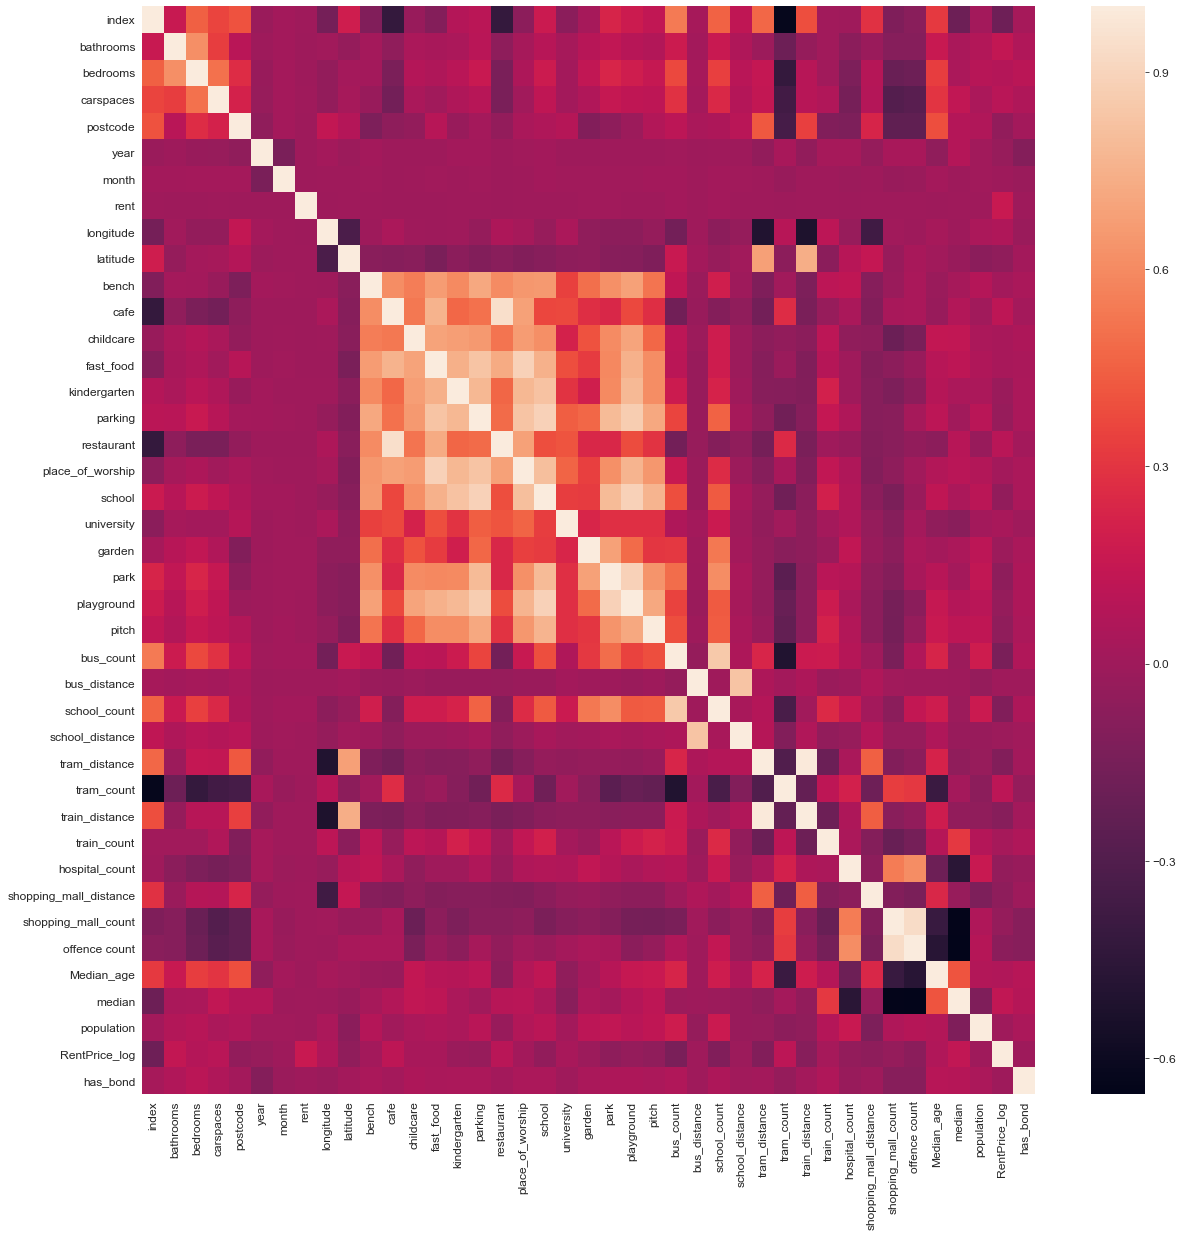

In [568]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(20,20))
sns.heatmap(newdf.corr())

In [656]:
newdf = newdf.drop(['index','longitude', 'latitude'],axis = 1)

In [658]:
newdf

,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,rent,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,bus_count,bus_distance,school_count,school_distance,tram_distance,tram_count,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,offence count,incidents recorded,Median_age,median,population,RentPrice_log,has_bond
0,1.0,1.0,0.0,3205,south melbourne,2019,1,360.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.375,3,0.577,0.116,24,2.804,0,0,1.388,0,22895,17201,38.256757,66259.675774,12753.000000,5.886104,0
1,2.0,2.0,1.0,3205,south melbourne,2019,1,725.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.730,3,0.299,0.111,24,2.442,0,0,1.714,0,22895,17201,38.256757,66259.675774,12753.000000,6.586172,0
2,1.0,2.0,0.0,3205,south melbourne,2019,1,500.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.766,3,0.579,0.059,24,2.751,0,0,1.927,0,22895,17201,38.256757,66259.675774,12753.000000,6.214608,0
3,1.0,3.0,0.0,3205,south melbourne,2019,1,795.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.209,3,0.165,0.139,24,3.457,0,0,1.304,0,22895,17201,38.256757,66259.675774,12753.000000,6.678342,0
4,2.0,2.0,0.0,3205,south melbourne,2019,1,825.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.143,3,0.475,0.394,24,3.544,0,0,1.370,0,22895,17201,38.256757,66259.675774,12753.000000,6.715383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105918,1.0,3.0,1.0,3701,dartmouth,2022,5,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.649,2,10.219,249.694,0,233.799,0,0,68.639,0,302,230,47.856776,44583.025987,6181.185987,5.634790,0
105919,1.0,3.0,1.0,3701,dartmouth,2022,6,290.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.627,2,10.283,249.772,0,233.877,0,0,68.662,0,302,230,47.856776,44583.025987,6181.185987,5.669881,0
105920,1.0,3.0,2.0,3700,tallangatta,2022,8,470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.265,3,7.593,253.141,0,240.828,0,1,32.738,0,605,484,37.094642,55510.153714,6181.185987,6.152733,0
105921,1.0,3.0,2.0,3700,tallangatta,2021,3,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.234,3,0.271,248.167,0,236.377,0,1,25.565,0,605,484,37.094642,55510.153714,6153.000000,5.736572,0


In [659]:
house_count = pd.DataFrame(newdf['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)
house_count

,postcode,count
0,3000,9306
1,3008,4460
2,3006,3343
3,3029,2929
4,3141,2804
...,...,...
376,3453,1
377,3509,1
378,3401,1
379,3525,1


In [602]:
newdf[['postcode','offence count']].drop_duplicates()

,postcode,offence count
0,3205,22895
48,3206,8225
152,3207,19587
256,3004,51905
939,3006,35302
...,...,...
105898,3388,293
105909,3260,2667
105911,3700,605
105912,3701,302


In [660]:
newdf['Median_age'] = newdf['Median_age'].apply(lambda x:round(x))
newdf['population'] = newdf['population'].apply(lambda x:round(x))

In [661]:
group_dict = dict()
for index, values in newdf.iterrows():
    bathroom = str(values['bathrooms'])
    bedroom = str(values['bedrooms'])
    carspaces = str(values['carspaces'])
    postcodes = str(values['postcode'])
    year = str(values['year'])
    month = str(values['month'])
    key = bathroom +' ' + bedroom+' ' + carspaces+' ' +postcodes+' ' +year+' ' + month
    group_list = group_dict.get(key,[])
    group_list.append(values)
    group_dict[key] = group_list

In [662]:
predict_dict = dict()
for index, values in newdf.iterrows():
    bathroom = str(values['bathrooms'])
    bedroom = str(values['bedrooms'])
    carspaces = str(values['carspaces'])
    postcodes = str(values['postcode'])
    key = bathroom+' ' + bedroom+' ' +carspaces+' ' +postcodes
    predict_list = predict_dict.get(key,[])
    predict_list.append(values)
    predict_dict[key] = predict_list


In [663]:
data_list = []
for key, values in group_dict.items():
    rent_price_sum = 0
    bus_distance_sum = 0
    tram_distance_sum = 0
    train_distance_sum = 0
    shopping_mall_distance_sum = 0
    num = len(values)
    for item in values:
        rent_price_sum += item['RentPrice_log']
        bus_distance_sum += item['bus_distance']
        train_distance_sum += item['train_distance']
        tram_distance_sum += item['tram_distance']
        shopping_mall_distance_sum += item['shopping_mall_distance']
    rent_mean = rent_price_sum/num
    bus_mean = bus_distance_sum/num
    train_mean = train_distance_sum/num
    tram_mean = tram_distance_sum/num
    shopping_mall_mean = shopping_mall_distance_sum/num
    data_list.append([item['bathrooms'],item['bedrooms'],item['carspaces'],item['postcode'],item['year'],item['month'],train_mean,item['train_count'],
    item['hospital_count'],shopping_mall_mean,item['shopping_mall_count'],item['bench'],item['cafe'],item['childcare'],item['fast_food'],item['kindergarten'],item['parking'],item['restaurant']
    ,item['place_of_worship'],item['school'],item['university'], item['garden'], item['park'],item['playground'], item['pitch'], item['offence count'], item['incidents recorded'],bus_mean,item['bus_count'],item['school_count'],tram_mean,
    item['tram_count'],rent_mean,item['Median_age'],item['median'],item['population'],item['has_bond']])
    # data_list.append((item['bathrooms'],item['bedrooms'],item['carspaces'],item['postcode'],item['year'],item['month'],rent_mean,bus_mean,train_mean,tram_mean,shopping_mall_mean))



In [664]:
data_list_2 = []
for key, values in predict_dict.items():
    rent_price_sum = 0
    bus_distance_sum = 0
    tram_distance_sum = 0
    train_distance_sum = 0
    shopping_mall_distance_sum = 0
    num = len(values)
    for item in values:
        rent_price_sum += item['RentPrice_log']
        bus_distance_sum += item['bus_distance']
        train_distance_sum += item['train_distance']
        tram_distance_sum += item['tram_distance']
        shopping_mall_distance_sum += item['shopping_mall_distance']
    rent_mean = rent_price_sum/num
    bus_mean = bus_distance_sum/num
    train_mean = train_distance_sum/num
    tram_mean = tram_distance_sum/num
    shopping_mall_mean = shopping_mall_distance_sum/num
    data_list_2.append([item['bathrooms'],item['bedrooms'],item['carspaces'],item['postcode'],train_mean,item['train_count'],
    item['hospital_count'],shopping_mall_mean,item['shopping_mall_count'],item['bench'],item['cafe'],item['childcare'],item['fast_food'],item['kindergarten'],item['parking'],item['restaurant']
    ,item['place_of_worship'],item['school'],item['university'], item['garden'], item['park'],item['playground'], item['pitch'], item['offence count'], item['incidents recorded'],bus_mean,item['bus_count'],item['school_count'],tram_mean,
    item['tram_count'],rent_mean,item['Median_age'],item['median'],item['population'],item['has_bond']])

In [665]:
df = pd.DataFrame(data_list, columns=['bathrooms', 'bedrooms', 'carspaces', 'postcode', 'year',
       'month', 'train_distance', 'train_count',
       'hospital_count', 'shopping_mall_distance', 'shopping_mall_count',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count','incidents recorded', 'bus_distance',
       'bus_count', 'school_count', 'tram_distance', 'tram_count', 'rent',
       'Median_age', 'median', 'population', 'has_bond'])
df

,bathrooms,bedrooms,carspaces,postcode,year,month,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond
0,1.0,1.0,0.0,3205,2019,1,2.677111,0,0,1.341556,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.504111,10,3,0.124444,24,5.870629,38,66259.675774,1281,0
1,2.0,2.0,1.0,3205,2019,1,2.374714,0,0,1.422286,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.730429,10,3,0.162143,24,6.406003,38,66259.675774,1281,1
2,1.0,2.0,0.0,3205,2019,1,2.863250,0,0,1.663750,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.570250,10,3,0.151750,24,6.407817,38,66259.675774,12753,0
3,1.0,3.0,0.0,3205,2019,1,3.122500,0,0,1.413500,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.318500,10,3,0.112500,24,6.711789,38,66259.675774,12753,0
4,2.0,2.0,0.0,3205,2019,1,3.534400,0,0,1.388800,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.137800,10,3,0.334000,24,6.712508,38,66259.675774,12753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48468,1.0,3.0,1.0,3701,2022,5,233.799000,0,0,68.639000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.649000,1,2,249.694000,0,5.634790,48,44583.025987,6181,0
48469,1.0,3.0,1.0,3701,2022,6,233.877000,0,0,68.662000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.627000,1,2,249.772000,0,5.669881,48,44583.025987,6181,0
48470,1.0,3.0,2.0,3700,2022,8,240.828000,0,1,32.738000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,7.265000,1,3,253.141000,0,6.152733,37,55510.153714,6181,0
48471,1.0,3.0,2.0,3700,2021,3,236.377000,0,1,25.565000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.234000,1,3,248.167000,0,5.736572,37,55510.153714,6153,0


In [666]:
df2 = pd.DataFrame(data_list_2, columns=['bathrooms', 'bedrooms', 'carspaces', 'postcode', 'train_distance', 'train_count',
       'hospital_count', 'shopping_mall_distance', 'shopping_mall_count',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count','incidents recorded', 'bus_distance',
       'bus_count', 'school_count', 'tram_distance', 'tram_count', 'rent',
       'Median_age', 'median', 'population', 'has_bond'])
df2

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,5.854335,38,68466.042203,1942,1
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,6.379859,39,69810.297518,6528,0
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,6.361757,38,67037.994227,1705,0
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,6.570844,38,66259.675774,12753,1
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,6.580744,38,67037.994227,1705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8048,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,5.632478,48,44583.025987,6181,0
8049,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,5.857933,37,55510.153714,6153,0
8050,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,5.799093,37,55510.153714,6153,0
8051,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,5.915746,37,55510.153714,6153,0


In [667]:
df_combined = df.merge(house_count, on = 'postcode', how = 'left').fillna(0)
cpi_df = pd.read_csv('../data/cpi.csv').drop({'Unnamed: 0'}, axis = 1)
df_combined = df_combined.merge(cpi_df, on = 'year')
df_combined

,bathrooms,bedrooms,carspaces,postcode,year,month,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond,count,cpi
0,1.0,1.0,0.0,3205,2019,1,2.677111,0,0,1.341556,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.504111,10,3,0.124444,24,5.870629,38,66259.675774,1281,0,1630,255.65
1,2.0,2.0,1.0,3205,2019,1,2.374714,0,0,1.422286,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.730429,10,3,0.162143,24,6.406003,38,66259.675774,1281,1,1630,255.65
2,1.0,2.0,0.0,3205,2019,1,2.863250,0,0,1.663750,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.570250,10,3,0.151750,24,6.407817,38,66259.675774,12753,0,1630,255.65
3,1.0,3.0,0.0,3205,2019,1,3.122500,0,0,1.413500,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.318500,10,3,0.112500,24,6.711789,38,66259.675774,12753,0,1630,255.65
4,2.0,2.0,0.0,3205,2019,1,3.534400,0,0,1.388800,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.137800,10,3,0.334000,24,6.712508,38,66259.675774,12753,0,1630,255.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48468,1.0,1.0,4.0,3460,2022,8,58.745000,0,1,35.093000,0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1879,1553,0.705000,2,3,78.624000,0,6.163315,52,47811.172529,10028,0,79,271.06
48469,1.0,2.0,0.0,3396,2022,9,294.648000,0,1,110.839000,0,0.0,3.0,0.0,1.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,5.0,1.0,8.0,268,188,0.186000,1,2,315.390000,0,5.192957,37,55510.153714,6407,0,3,271.06
48470,1.0,3.0,1.0,3701,2022,5,233.799000,0,0,68.639000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.649000,1,2,249.694000,0,5.634790,48,44583.025987,6181,0,5,271.06
48471,1.0,3.0,1.0,3701,2022,6,233.877000,0,0,68.662000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.627000,1,2,249.772000,0,5.669881,48,44583.025987,6181,0,5,271.06


In [631]:
xls = pd.ExcelFile('../data/gdp.xlsx')
df1 = pd.read_excel(xls, 'Data')[36:].drop('Unnamed: 0', axis = 1).rename({'Unnamed: 1':'year','Unnamed: 2':'gdp'},axis = 1).reset_index().drop('index',axis = 1)
gdp_list = list(df1['gdp'])
l = []
m = 0
for i in range(2019,2026):
    l.append([i,gdp_list[m]])
    m = m+1
gdp_df = pd.DataFrame(l, columns=['year','gdp'])
gdp_df

,year,gdp
0,2019,54254.86
1,2020,52847.68
2,2021,63529.29
3,2022,67464.39
4,2023,69717.12
5,2024,72187.63
6,2025,74353.74


In [668]:
df_combined = df_combined.merge(gdp_df, on = 'year')


In [671]:
df_combined.rent

0        5.870629
1        6.406003
2        6.407817
3        6.711789
4        6.712508
           ...   
48468    6.163315
48469    5.192957
48470    5.634790
48471    5.669881
48472    6.152733
Name: rent, Length: 48473, dtype: float64

In [675]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
y = df_combined['rent']
X = df_combined.drop(['rent'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
nn = MLPRegressor()
nn.fit(X_train_std, y_train)
TrainScore = nn.score(X_train_std, y_train)
TestScore = nn.score(X_test_std, y_test)
TestScore

0.5645811410123334

In [673]:
rfc = RandomForestRegressor(max_depth = 10)  
rfc = rfc.fit(X_train_std, y_train)
print(f'model score on training data: {rfc.score(X_train_std, y_train)}')
print(f'model score on testing data: {rfc.score(X_test_std, y_test)}')

model score on training data: 0.8010215101729925
model score on testing data: 0.6694225431650465


In [676]:
r = permutation_importance(rfc, X_train_std, y_train, n_repeats = 5, random_state = 0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_combined.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

bathrooms0.752 +/- 0.008
bedrooms0.320 +/- 0.002
population0.240 +/- 0.023
tram_distance0.236 +/- 0.005
bus_count0.063 +/- 0.003
Median_age0.047 +/- 0.001
has_bond0.043 +/- 0.002
postcode0.034 +/- 0.001
shopping_mall_distance0.027 +/- 0.002
carspaces0.024 +/- 0.001
train_distance0.024 +/- 0.001
median  0.020 +/- 0.001
bus_distance0.011 +/- 0.001
month   0.009 +/- 0.001
offence count0.007 +/- 0.001
rent    0.007 +/- 0.000
cpi     0.006 +/- 0.000
incidents recorded0.005 +/- 0.000
childcare0.004 +/- 0.000
year    0.004 +/- 0.000
park    0.004 +/- 0.000
count   0.003 +/- 0.000
parking 0.003 +/- 0.000
school_count0.003 +/- 0.000
hospital_count0.003 +/- 0.001
pitch   0.003 +/- 0.000
tram_count0.003 +/- 0.000
kindergarten0.003 +/- 0.000
garden  0.002 +/- 0.000
school  0.002 +/- 0.000
playground0.002 +/- 0.000
cafe    0.002 +/- 0.000
bench   0.002 +/- 0.000
restaurant0.002 +/- 0.000
shopping_mall_count0.002 +/- 0.000
train_count0.001 +/- 0.000
place_of_worship0.001 +/- 0.000
fast_food0.001 +/-

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

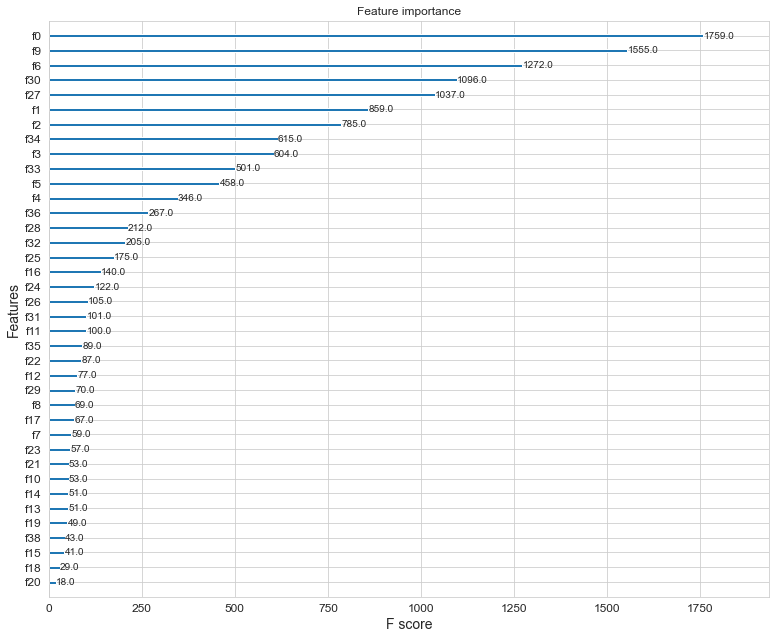

In [678]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
)
xgbc.fit(
    X_train_std, 
    y_train
)
fea_imp = xgbc.feature_importances_
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)

In [679]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def dtClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        dt = DecisionTreeRegressor().fit(X_train, y_train)
        
        score = dt.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [680]:
y = df_combined['rent']
X = df_combined.drop(['rent'], axis=1)
dtClassifier(X, y)

(array([0.37249363, 0.32686736, 0.42881742]), 0.3761)

In [682]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

def logregClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        lr = LinearRegression().fit(X_train, y_train)
        
        score = lr.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [683]:
y = df_combined['rent']
X = df_combined.drop(['rent'], axis=1)
logregClassifier(X,y)

(array([0.12074559, 0.12931775, 0.12303708, 0.11112794, 0.10350674]), 0.1175)

In [684]:
df2

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,5.854335,38,68466.042203,1942,1
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,6.379859,39,69810.297518,6528,0
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,6.361757,38,67037.994227,1705,0
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,6.570844,38,66259.675774,12753,1
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,6.580744,38,67037.994227,1705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8048,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,5.632478,48,44583.025987,6181,0
8049,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,5.857933,37,55510.153714,6153,0
8050,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,5.799093,37,55510.153714,6153,0
8051,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,5.915746,37,55510.153714,6153,0


In [685]:
df3 = pd.DataFrame()
for year in range(2023,2026):
    for month in range(1,13):
        tmp_df = df2.copy()
        year_list = [year]*len(df2)
        month_list = [month]*len(df2)
        tmp_df['year'] = year_list
        tmp_df['month'] = month_list
        df3= pd.concat([df3,tmp_df])
df3 = df3.reset_index().drop(['index'],axis = 1)
df3

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond,year,month
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,5.854335,38,68466.042203,1942,1,2023,1
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,6.379859,39,69810.297518,6528,0,2023,1
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,6.361757,38,67037.994227,1705,0,2023,1
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,6.570844,38,66259.675774,12753,1,2023,1
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,6.580744,38,67037.994227,1705,1,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289903,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,5.632478,48,44583.025987,6181,0,2025,12
289904,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,5.857933,37,55510.153714,6153,0,2025,12
289905,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,5.799093,37,55510.153714,6153,0,2025,12
289906,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,5.915746,37,55510.153714,6153,0,2025,12


In [686]:
population = pd.read_csv('../data/population_forcasting.csv')
population_count = dict()
population['Postcode'] = population['Postcode'].fillna(value=0)
for index, value in population.iterrows():
    postcode = int(value['Postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    population_count[key] = value['Total']
population_list = []
for index, value in df3.iterrows():
    postcode = int(value['postcode'])
    year = int(value['year'])
    key = str(postcode)+ ' ' + str(year)
    try: 
        count = population_count[key]
        population_list.append(count)
    except:
        population_list.append(None)
df3['population'] = population_list
df3

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond,year,month
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,5.854335,38,68466.042203,NaN,1,2023,1
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,6.379859,39,69810.297518,NaN,0,2023,1
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,6.361757,38,67037.994227,NaN,0,2023,1
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,6.570844,38,66259.675774,NaN,1,2023,1
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,6.580744,38,67037.994227,NaN,1,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289903,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,5.632478,48,44583.025987,25359.0,0,2025,12
289904,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,5.857933,37,55510.153714,NaN,0,2025,12
289905,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,5.799093,37,55510.153714,NaN,0,2025,12
289906,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,5.915746,37,55510.153714,NaN,0,2025,12


In [687]:
df3["postcode"] = df3["postcode"].apply(lambda x: int(x))
cpi_df = pd.read_csv('../data/cpi.csv')
df3 = df3.merge(cpi_df, on = 'year', how='left')

In [688]:
f = open("../data/year_school_address.txt")
data = json.load(f)
new_school = pd.DataFrame(data, columns=['year','link','address'])
def get_postcode(add):
    add_list = add.split(' ')
    return add_list[-1]
new_school['postcode'] = new_school['address'].apply(get_postcode)

In [689]:
school_dict = {}
for index, value in new_school.iterrows():
    year = value['year']
    postcode = value['postcode']
    key = year + ' ' + postcode
    if key not in school_dict.keys():
        school_dict[key] = 1
    else:
        school_dict[key] += 1
for index, values in df3.iterrows():
    year = str(values['year'])
    postcode = str(values['postcode'])
    key = year + ' ' + postcode
    if key in school_dict.keys():
        school_values = values['school']
        df3.loc[index,'school'] = school_values + school_dict[key]
df3 = df3.merge(gdp_df, on = 'year', how='left')
df3 = df3.merge(house_count,  on = 'postcode', how = 'left').fillna(0)
df3

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,rent,Median_age,median,population,has_bond,year,month,Unnamed: 0,cpi,gdp,count
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,5.854335,38,68466.042203,0.0,1,2023,1,4,277.84,69717.12,1630
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,6.379859,39,69810.297518,0.0,0,2023,1,4,277.84,69717.12,1630
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,6.361757,38,67037.994227,0.0,0,2023,1,4,277.84,69717.12,1630
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,6.570844,38,66259.675774,0.0,1,2023,1,4,277.84,69717.12,1630
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,6.580744,38,67037.994227,0.0,1,2023,1,4,277.84,69717.12,1630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289903,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,5.632478,48,44583.025987,25359.0,0,2025,12,6,291.50,74353.74,5
289904,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,5.857933,37,55510.153714,0.0,0,2025,12,6,291.50,74353.74,6
289905,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,5.799093,37,55510.153714,0.0,0,2025,12,6,291.50,74353.74,6
289906,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,5.915746,37,55510.153714,0.0,0,2025,12,6,291.50,74353.74,6


In [692]:
df3.columns

Index(['bathrooms', 'bedrooms', 'carspaces', 'postcode', 'train_distance',
       'train_count', 'hospital_count', 'shopping_mall_distance',
       'shopping_mall_count', 'bench', 'cafe', 'childcare', 'fast_food',
       'kindergarten', 'parking', 'restaurant', 'place_of_worship', 'school',
       'university', 'garden', 'park', 'playground', 'pitch', 'offence count',
       'incidents recorded', 'bus_distance', 'bus_count', 'school_count',
       'tram_distance', 'tram_count', 'Median_age', 'median', 'population',
       'has_bond', 'year', 'month', 'cpi', 'gdp', 'count'],
      dtype='object')

In [691]:
df3 = df3.drop(['Unnamed: 0','rent'], axis = 1)

In [693]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'carspaces', 'postcode', 'year', 'month',
       'train_distance', 'train_count', 'hospital_count',
       'shopping_mall_distance', 'shopping_mall_count', 'bench', 'cafe',
       'childcare', 'fast_food', 'kindergarten', 'parking', 'restaurant',
       'place_of_worship', 'school', 'university', 'garden', 'park',
       'playground', 'pitch', 'offence count', 'incidents recorded',
       'bus_distance', 'bus_count', 'school_count', 'tram_distance',
       'tram_count', 'Median_age', 'median', 'population', 'has_bond', 'count',
       'cpi', 'gdp'],
      dtype='object')

In [694]:
predict_std = sc.transform(df3)
rent_list = rfc.predict(predict_std)
df3['predicted_rent'] = rent_list

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [695]:
df3

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,Median_age,median,population,has_bond,year,month,cpi,gdp,count,predicted_rent
0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,38,68466.042203,0.0,1,2023,1,277.84,69717.12,1630,5.660834
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,39,69810.297518,0.0,0,2023,1,277.84,69717.12,1630,6.013612
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,38,67037.994227,0.0,0,2023,1,277.84,69717.12,1630,5.725407
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,38,66259.675774,0.0,1,2023,1,277.84,69717.12,1630,5.962665
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,38,67037.994227,0.0,1,2023,1,277.84,69717.12,1630,6.013612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289903,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,48,44583.025987,25359.0,0,2025,12,291.50,74353.74,5,5.955990
289904,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.925252
289905,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.920134
289906,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.925252


In [696]:
df3['predicted_rent_original'] = df3['predicted_rent'].apply(lambda x: np.exp(x))

In [700]:
df3.to_csv('../data/curated/predicted_df.csv')
df3 = pd.read_csv('../data/curated/predicted_df.csv')


In [703]:
suburb_postcode_df = pd.read_csv('../data/prepared_data.csv')[['postcode','surburb']].drop_duplicates()
suburb_postcode_df

,postcode,surburb
0,3205,south melbourne
48,3206,albert park
152,3207,port melbourne
256,3004,melbourne
939,3006,southbank
...,...,...
113152,3260,camperdown
113154,3700,tallangatta
113155,3701,eskdale
113156,3701,dartmouth


In [704]:
postcode_suburb_list = dict()
for index, value in suburb_postcode_df.iterrows():
    postcode = value['postcode']
    suburb = value['surburb']
    key = str(postcode)
    postcode_suburb_list[key] = suburb
p_list = []
for index, data in df3.iterrows():
    postcode = str(int(data['postcode']))
    p_list.append(postcode_suburb_list[postcode])
df3['suburb'] = p_list

In [705]:
df3.to_csv('../data/curated/predicted_df_combined.csv')
df3_combinded = pd.read_csv('../data/curated/predicted_df_combined.csv').drop(['Unnamed: 0'], axis = 1)

In [706]:
df3_combinded

,Unnamed: 0.1,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,tram_distance,tram_count,Median_age,median,population,has_bond,year,month,cpi,gdp,count,predicted_rent,predicted_rent_original,suburb
0,0,1.0,1.0,0.0,3205,2.371922,0,0,1.532725,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.792046,10,3,0.134303,24,38,68466.042203,0.0,1,2023,1,277.84,69717.12,1630,5.660834,287.388145,south melbourne
1,1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,0.183377,24,39,69810.297518,0.0,0,2023,1,277.84,69717.12,1630,6.013612,408.957612,south melbourne
2,2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,0.208787,24,38,67037.994227,0.0,0,2023,1,277.84,69717.12,1630,5.725407,306.557869,south melbourne
3,3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,0.215850,24,38,66259.675774,0.0,1,2023,1,277.84,69717.12,1630,5.962665,388.644625,south melbourne
4,4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,0.290900,24,38,67037.994227,0.0,1,2023,1,277.84,69717.12,1630,6.013612,408.957612,south melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289903,289903,1.0,3.0,1.0,3701,233.838000,0,0,68.650500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302,230,52.638000,1,2,249.733000,0,48,44583.025987,25359.0,0,2025,12,291.50,74353.74,5,5.955990,386.058902,dartmouth
289904,289904,1.0,3.0,3.0,3700,236.495000,0,1,25.418000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.475000,1,3,248.264000,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.925252,374.372818,tallangatta
289905,289905,1.0,3.0,1.0,3700,236.068000,0,1,25.575000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,0.171000,1,3,247.873000,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.920134,372.461632,tallangatta
289906,289906,1.0,3.0,2.0,3700,237.926667,0,1,28.007000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605,484,2.618667,1,3,249.893333,0,37,55510.153714,0.0,0,2025,12,291.50,74353.74,6,5.925252,374.372818,tallangatta


In [708]:
suburb_mean_rent = pd.DataFrame(df3_combinded.groupby(['year','postcode']).mean('predicted_rent_original')['predicted_rent_original']).reset_index().rename({'predicted_rent':'rent'}, axis = 1)
suburb_mean_rent

,year,postcode,predicted_rent_original
0,2023,3000,346.112696
1,2023,3003,327.868108
2,2023,3004,311.140471
3,2023,3006,300.244891
4,2023,3008,248.035497
...,...,...,...
1138,2025,3977,459.515165
1139,2025,3978,483.261944
1140,2025,3980,432.640458
1141,2025,3981,455.299487


In [710]:
history_rent = pd.DataFrame(newdf.groupby(['year','postcode']).mean('rent')['rent']).reset_index().rename({'surburb':'suburb'}, axis = 1)
history_rent

,year,postcode,rent
0,2019,3000,756.177605
1,2019,3003,536.830986
2,2019,3004,906.021505
3,2019,3006,797.562371
4,2019,3008,1411.395169
...,...,...,...
1314,2022,3976,426.744186
1315,2022,3977,456.101695
1316,2022,3978,493.700000
1317,2022,3981,600.000000


In [711]:
combined_rent = pd.concat([history_rent, suburb_mean_rent])
combined_rent = combined_rent.sort_values(by = ['postcode','year'])
yearly_growth_list = []
for name, group in combined_rent.groupby('postcode'):   
    group['lag(rent,1)'] = group['rent'].shift(1)
    growth_dict = dict()
    growth_dict['postcode'] = name
    for index, value in group.iterrows():
        rent = value['rent']
        lag = value['lag(rent,1)']
        rate = 0
        if pd.isna(lag):
            rete = None
        else:
            rate = (rent-lag)/lag *100
        growth_dict['year'+ ' ' + str(int(value['year']))] = rate
    yearly_growth_list.append(growth_dict)

In [712]:
rate_df = pd.DataFrame(yearly_growth_list)
top_10 = rate_df.sort_values(by = ['year 2023','year 2024', 'year 2025'],ascending=False)[:10]
top_10

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025
0,3000,0.0,-35.967955,-9.149093,102.779545,NaN,0,0
1,3003,0.0,40.272648,-46.288937,16.678933,NaN,0,0
2,3004,0.0,-29.495054,6.871504,-3.388477,NaN,0,0
3,3006,0.0,-29.142063,-17.583712,32.309991,NaN,0,0
4,3008,0.0,-57.330664,40.887186,22.087723,NaN,0,0
5,3011,0.0,55.596504,25.616374,28.625538,NaN,0,0
6,3012,0.0,-12.617464,100.497657,0.390570,NaN,0,0
7,3013,0.0,3.349393,69.964680,-77.889736,NaN,0,0
8,3015,0.0,-8.858562,11.374121,0.971629,NaN,0,0
9,3016,0.0,72.242351,-5.255444,157.033574,NaN,0,0


In [713]:
top_10.merge(suburb_postcode_df, on = 'postcode', how = 'left')

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025,surburb
0,3000,0.0,-35.967955,-9.149093,102.779545,NaN,0,0,melbourne
1,3003,0.0,40.272648,-46.288937,16.678933,NaN,0,0,west melbourne
2,3004,0.0,-29.495054,6.871504,-3.388477,NaN,0,0,melbourne
3,3004,0.0,-29.495054,6.871504,-3.388477,NaN,0,0,melbourne st kilda road
4,3006,0.0,-29.142063,-17.583712,32.309991,NaN,0,0,southbank
5,3006,0.0,-29.142063,-17.583712,32.309991,NaN,0,0,south wharf
6,3008,0.0,-57.330664,40.887186,22.087723,NaN,0,0,docklands
7,3011,0.0,55.596504,25.616374,28.625538,NaN,0,0,seddon
8,3011,0.0,55.596504,25.616374,28.625538,NaN,0,0,footscray
9,3012,0.0,-12.617464,100.497657,0.390570,NaN,0,0,brooklyn


In [714]:
newdf

,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,rent,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,bus_count,bus_distance,school_count,school_distance,tram_distance,tram_count,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,offence count,incidents recorded,Median_age,median,population,RentPrice_log,has_bond
0,1.0,1.0,0.0,3205,south melbourne,2019,1,360.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.375,3,0.577,0.116,24,2.804,0,0,1.388,0,22895,17201,38,66259.675774,12753,5.886104,0
1,2.0,2.0,1.0,3205,south melbourne,2019,1,725.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.730,3,0.299,0.111,24,2.442,0,0,1.714,0,22895,17201,38,66259.675774,12753,6.586172,0
2,1.0,2.0,0.0,3205,south melbourne,2019,1,500.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.766,3,0.579,0.059,24,2.751,0,0,1.927,0,22895,17201,38,66259.675774,12753,6.214608,0
3,1.0,3.0,0.0,3205,south melbourne,2019,1,795.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.209,3,0.165,0.139,24,3.457,0,0,1.304,0,22895,17201,38,66259.675774,12753,6.678342,0
4,2.0,2.0,0.0,3205,south melbourne,2019,1,825.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,10,0.143,3,0.475,0.394,24,3.544,0,0,1.370,0,22895,17201,38,66259.675774,12753,6.715383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105918,1.0,3.0,1.0,3701,dartmouth,2022,5,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.649,2,10.219,249.694,0,233.799,0,0,68.639,0,302,230,48,44583.025987,6181,5.634790,0
105919,1.0,3.0,1.0,3701,dartmouth,2022,6,290.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.627,2,10.283,249.772,0,233.877,0,0,68.662,0,302,230,48,44583.025987,6181,5.669881,0
105920,1.0,3.0,2.0,3700,tallangatta,2022,8,470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.265,3,7.593,253.141,0,240.828,0,1,32.738,0,605,484,37,55510.153714,6181,6.152733,0
105921,1.0,3.0,2.0,3700,tallangatta,2021,3,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.234,3,0.271,248.167,0,236.377,0,1,25.565,0,605,484,37,55510.153714,6153,5.736572,0


In [715]:
index = []
for name, group in newdf.groupby('surburb'):
    rent = group['rent'].median()
    median_income = group['median'].median()
    house_cost = rent/(median_income + 0.00001)
    bus = int(list(group['count of bus stop'].drop_duplicates())[0]) * group['distance of the closest bus stop'].mean()
    tram = int(list(group['count of tram stop'].drop_duplicates())[0]) * group['distance of the closest tram stop'].mean()
    train = int(list(group['count of train stop'].drop_duplicates())[0]) * group['distance of the closest train stop'].mean()
    vline = int(list(group['count of vline stop'].drop_duplicates())[0]) * group['distance of the closest vline stop'].mean()
    shopping_mall = int(list(group['count of shopping mall'].drop_duplicates())[0]) * group['distance to the closest shopping mall'].mean()
    eating = list(group['cafe'].drop_duplicates())[0] + list(group['fast_food'].drop_duplicates())[0] + list(group['restaurant'].drop_duplicates())[0]
    enviornment = list(group['garden'].drop_duplicates())[0] + list(group['park'].drop_duplicates())[0] + list(group['playground'].drop_duplicates())[0]+list(group['pitch'].drop_duplicates())[0]+list(group['place_of_worship'].drop_duplicates())[0]
    education = list(group['count of school'].drop_duplicates())[0] + list(group['childcare'].drop_duplicates())[0] + list(group['kindergarten'].drop_duplicates())[0]+list(group['university'].drop_duplicates())[0]
    safty = list(group['offence count'].drop_duplicates())[0] + list(group['incidents recorded'].drop_duplicates())[0]
    health_care = list(group['count of hospital'].drop_duplicates())[0]
    livable_index = house_cost * 0.2 + (bus+tram+train+vline) * 0.2 + shopping_mall* 0.05 + eating*0.05 + education*0.1+ enviornment*0.2 + health_care*0.1 + safty*0.1
    index.append([name,livable_index])
index_df = pd.DataFrame(index, columns=['suburb','index'])

KeyError: 'count of bus stop'